<a href="https://colab.research.google.com/github/YMGYM/Cats_Dogs_Classification/blob/master/Cats_and_Dogs_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#구글 드라이브에서 데이터 마운트

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!unzip drive/My\ Drive/cat-and-dog.zip -d data

Archive:  drive/My Drive/cat-and-dog.zip
  inflating: data/test_set/test_set/cats/_DS_Store  
  inflating: data/test_set/test_set/cats/cat.4001.jpg  
  inflating: data/test_set/test_set/cats/cat.4002.jpg  
  inflating: data/test_set/test_set/cats/cat.4003.jpg  
  inflating: data/test_set/test_set/cats/cat.4004.jpg  
  inflating: data/test_set/test_set/cats/cat.4005.jpg  
  inflating: data/test_set/test_set/cats/cat.4006.jpg  
  inflating: data/test_set/test_set/cats/cat.4007.jpg  
  inflating: data/test_set/test_set/cats/cat.4008.jpg  
  inflating: data/test_set/test_set/cats/cat.4009.jpg  
  inflating: data/test_set/test_set/cats/cat.4010.jpg  
  inflating: data/test_set/test_set/cats/cat.4011.jpg  
  inflating: data/test_set/test_set/cats/cat.4012.jpg  
  inflating: data/test_set/test_set/cats/cat.4013.jpg  
  inflating: data/test_set/test_set/cats/cat.4014.jpg  
  inflating: data/test_set/test_set/cats/cat.4015.jpg  
  inflating: data/test_set/test_set/cats/cat.4016.jpg  
  inflatin

# import tensorflow 2.0

In [3]:
!pip install tensorflow==2.0.0-alpha0

     |████████████████████████████████| 79.9MB 102kB/s 
     |████████████████████████████████| 419kB 64.5MB/s 
     |████████████████████████████████| 3.0MB 42.5MB/s 
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
import tensorflow.keras as keras
import tensorflow as tf

In [3]:
tf.__version__

'2.0.0-alpha0'

# pathlib함수를 사용해서 경로 열기

In [0]:
import pathlib

In [0]:
!ls

data  drive  sample_data


In [0]:
data_dir = pathlib.Path('data/training_set/training_set/')
num_of_train_images = len(list(data_dir.glob('*/*.jpg')))

In [6]:
print(num_of_train_images)

8005


In [7]:
for item in data_dir.glob("*") :
    print(item.name)

dogs
cats


In [8]:
import IPython.display as display
from PIL import Image

cats = list(data_dir.glob('cats/*.jpg'))

for c in cats[:3]:
  # display.display(Image.open(str(c)))
  print(c)


data/training_set/training_set/cats/cat.485.jpg
data/training_set/training_set/cats/cat.3996.jpg
data/training_set/training_set/cats/cat.1148.jpg


# 이미지 전처리

In [0]:
image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)

## 하이퍼파라미터 세팅

In [0]:
import numpy as np

BATCH_SIZE = 50
IMG_HEIGHT = 100
IMG_WIDTH = 100
STEPS_PER_EPOCH = np.ceil(num_of_train_images/BATCH_SIZE)

# 학습 데이터 생성

In [23]:
import os

generated_train_data = image_generator.flow_from_directory(directory=data_dir, target_size = (IMG_HEIGHT, IMG_WIDTH), batch_size= BATCH_SIZE, classes=['dogs', 'cats'], shuffle=True)

Found 8005 images belonging to 2 classes.


# 배치 데이터 확인

In [0]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10)) # 이미지 크기를 10, 10 으로 조정
  for n in range(25):
    ax = plt.subplot(5, 5, n+1) # 5행 5열로 잡은 것 중 n+1번째에 그림을 그림.
    plt.imshow(image_batch[n])  # 이미지 표시
    plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
    plt.axis('off')

In [0]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob("*")])
CLASS_NAMES

array(['dogs', 'cats'], dtype='<U4')

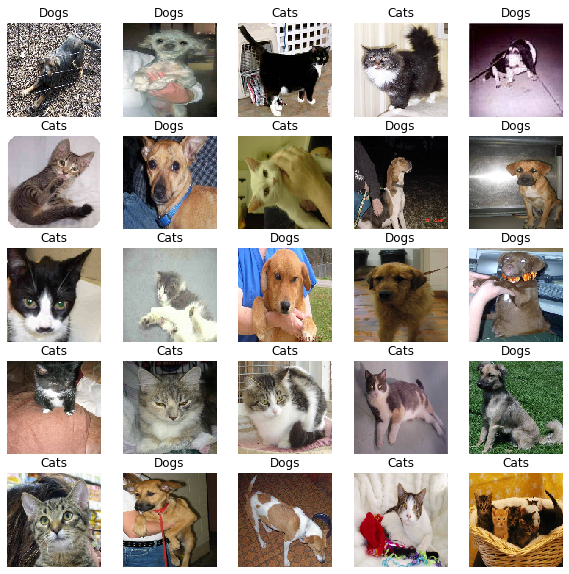

In [0]:
import matplotlib.pyplot as plt

image_batch, label_batch = next(generated_train_data)
show_batch(image_batch, label_batch)

In [0]:
image_batch, label_batch = next(generated_train_data)
label_batch

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [0]:
CLASS_NAMES[label_batch[1]==0][0].title()

'Cats'

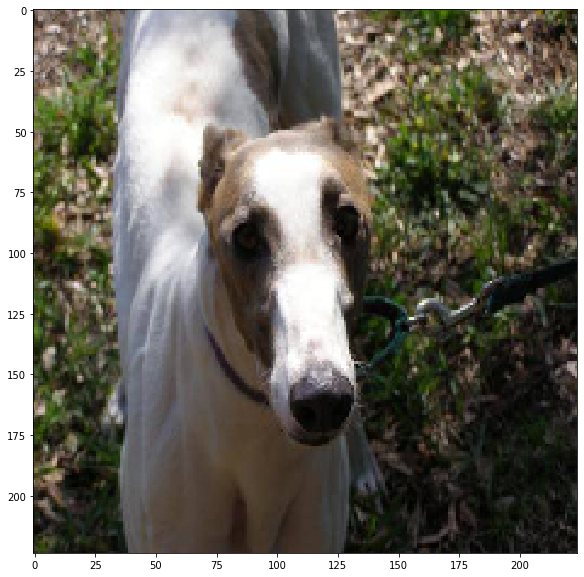

In [0]:
plt.figure(figsize=(10,10))
plt.imshow(image_batch[1])
plt.show()

In [0]:
temp_arr = np.array([1,2])
mask_arr = [True,False]
print(temp_arr[mask_arr])

mask_arr = [False,False]
print(temp_arr[mask_arr])

temp_arr2 = np.array([1,2,3])
mask_arr = [True,False,True]
print(temp_arr2[mask_arr])

[1]
[]
[1 3]


In [0]:
image_batch[0].shape

(224, 224, 3)

# 모델 생성

In [0]:
from tensorflow.keras import layers, models

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(filters=6, kernel_size = (6,6), activation="relu", input_shape=(100,100,3), kernel_regularizer=keras.regularizers.l2(0.001) ))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(filters=25, kernel_size = (6,6), activation="relu", input_shape=(100,100,3), kernel_regularizer=keras.regularizers.l2(0.001) ))
model.add(layers.Conv2D(filters=25, kernel_size = (3,3), activation="relu", input_shape=(100,100,3), kernel_regularizer=keras.regularizers.l2(0.001) ))
model.add(layers.Conv2D(filters=36, kernel_size = (3,3), activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(layers.MaxPool2D())
model.add(layers.Flatten())
model.add(layers.Dense(50, activation="relu"))
model.add(layers.Dense(2, activation="softmax"))

In [56]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 95, 95, 6)         654       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 47, 47, 6)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 42, 42, 25)        5425      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 40, 40, 25)        5650      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 38, 38, 36)        8136      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 19, 19, 36)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 12996)            

In [0]:
model2 = models.Sequential()
model2.add(layers.Conv2D(filters=96, kernel_size = (11,11), stride=4, activation="relu", input_shape=(227,227,3), kernel_regularizer=keras.regularizers.l2(0.001)))
model2.add(layers.MaxPool2D(pool_size=(3,3)))
model2.add(layers.Conv2D(filters=256, kernel_size = (5,5), stride=1, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)))
model2.add(layers.MaxPool2D(pool_size=(3,3)))
model2.add(layers.Conv2D(filters=, kernel_size = (6,6), activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)))
model2.add(layers.MaxPool2D())
model2.add(layers.Conv2D(filters=384, kernel_size = (3,3), activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)))
model2.add(layers.Conv2D(filters=384, kernel_size = (3,3), activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)))
model2.add(layers.Conv2D(filters=256, kernel_size = (3,3), activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)))
model2.add(layers.MaxPool2D(pool_size=(3,3)))
model2.add(layers.Flatten())
model2.add(layers.Dense(9216, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)))
model2.add(layers.Dense(4096, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)))
model2.add(layers.Dense(4096, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)))
model2.add(layers.Dense(2, activation="softmax"))

In [0]:
}model.compile(optimizer="RMSprop", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [0]:
model.fit_generator(generated_train_data, steps_per_epoch=STEPS_PER_EPOCH, epochs=5)

Epoch 1/5


InvalidArgumentError: ignored

In [0]:
model.compile(optimizer="rmsprop", loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

`sparse_categorical_crossentropy` 는 one-hot 이 아니라 정수 하나의 label일 떄 사용한다.

In [0]:
model.fit_generator(generated_train_data, steps_per_epoch=STEPS_PER_EPOCH, epochs=10)

Epoch 1/10
127/161 [======================>.......] - ETA: 26s - loss: 0.7491 - accuracy: 0.5460

# 모델 평가

In [44]:
test_data_generator = image_generator.flow_from_directory(directory="data/training_set/training_set", classes=['dogs', 'cats'], target_size = (IMG_HEIGHT, IMG_WIDTH))

Found 8005 images belonging to 2 classes.


In [52]:

test_data_generator = image_generator.flow_from_directory(directory="data/test_set/test_set", classes=['dogs', 'cats'], target_size = (IMG_HEIGHT, IMG_WIDTH))

Found 2023 images belonging to 2 classes.


In [54]:
model.evaluate_generator(test_data_generator)

[0.9153553564101458, 0.71428573]

In [0]:
image, label = next(test_data_generator)

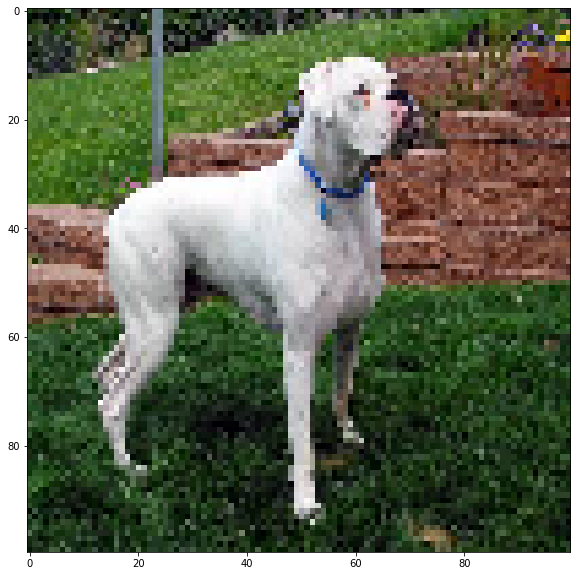

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(image[0])
plt.show()

In [48]:
label[0]

array([1., 0.], dtype=float32)